# Featrue Engineering

In [73]:
# import packaged
import pandas as pd
import numpy as np
import datetime as dt 

import matplotlib.pyplot as plt

In [110]:
# import data
df = pd.read_csv('final_df.csv', index_col=0)

# keep only necessary columns
to_keep = ['Location.x', 'JDay', 'Date', 'SsMean', 'Air Temp. Min. (�C)', 'Air Temp. Max. (�C)',
       'Air Temp. Avg. (�C)', 'Humidity Avg. (%)', 'Precip. (mm)',
       'Wind Speed 10 m Avg. (km/h)']

df2 = df[to_keep].copy()

# rename columns
df2.columns = ['Location', 'JDay', 'Date', 'SsMean', 'MinTemp', 'MaxTemp',
       'AvgTemp', 'AvgRH', 'Precip', 'AvgWindSpeed']

In [111]:
# drop SsMean nans
df2.dropna(inplace=True)

In [112]:
df2.dtypes

Location         object
JDay              int64
Date             object
SsMean          float64
MinTemp         float64
MaxTemp         float64
AvgTemp         float64
AvgRH           float64
Precip          float64
AvgWindSpeed    float64
dtype: object

In [113]:
df2.isnull().sum().sort_values().tail()

MaxTemp         0
AvgTemp         0
AvgRH           0
Precip          0
AvgWindSpeed    0
dtype: int64

In [114]:
# convert date to datetime
df2['Date'] = pd.to_datetime(df2['Date'])

In [115]:
# Create month 
df2['month'] = pd.to_datetime(df2['Date']).dt.month

In [116]:
# create year (from dt)
df2['year'] = pd.to_datetime(df2['Date']).dt.year

In [117]:
# create week of year
df2['YearWeek'] = pd.to_datetime(df2['Date']).dt.isocalendar().week

In [118]:
# calculate provincial dew point
def dew_point(RH, Temp):
    a = Temp
    b = ((100-RH)/5)
    DP = a-b
    return DP

df2['AvgDP'] = dew_point(df2['AvgRH'], df2['AvgTemp'])

In [6]:
# encode location

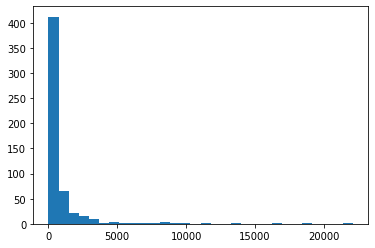

In [119]:
# look at target - log transform?
plt.hist(df2.SsMean, bins=30)
plt.show()

In [120]:
np.max(df2.SsMean)

22112.055

In [269]:
# add +1 to deal with 0s
df2['logSsMean'] = np.log(df2.SsMean + 1)

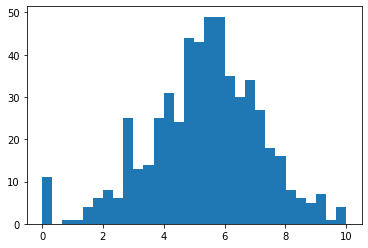

In [270]:
plt.hist(df2.logSsMean, bins=30)
plt.show()

In [106]:
# both year and location matter, sooooo averages have to be calculated for all of these separately

In [271]:
# create rolling average function

def rolling(data, col):
    # -1 day data
    name1 = col + '_1'
    # shift by 1
    lag1 = data[col].shift(1)
    # assign to column  
    data[name1] = lag1
    
    # -3 day mean
    name3 = col + '_3'
    # assign mean to column
    window3 = lag1.rolling(window=3).mean()
    data[name3] = window3
    
    # 7 day rolling mean leads to a lot of lost values
    # -7 day mean
    name7 = col + '_7'
    # assign mean to column
    window7 = lag1.rolling(window=7).mean()
    data[name7] = window7
    
    # fill NaN's with june mean info so that we can keep as much data as possible
    data[name1] = data[name1].fillna(value=data.iloc[1:7][name1].mean())
    data[name3] = data[name3].fillna(value=data.iloc[6:10][name3].mean())
    data[name7] = data[name7].fillna(value=data.iloc[13:20][name7].mean())
    
    # return new dataframe
    return data

In [272]:
# create dfs for each location and year 
# (don't actually need to do year, because location names do not overlap b/w years)
locations = df2['Location'].unique().tolist()

dfa = df2.loc[df2['Location'] == locations[0]].copy()
dfb = df2.loc[df2['Location'] == locations[1]].copy()
dfc = df2.loc[df2['Location'] == locations[2]].copy()
dfd = df2.loc[df2['Location'] == locations[3]].copy()
dfe = df2.loc[df2['Location'] == locations[4]].copy()
dff = df2.loc[df2['Location'] == locations[5]].copy()
dfg = df2.loc[df2['Location'] == locations[6]].copy()
dfh = df2.loc[df2['Location'] == locations[7]].copy()
dfi = df2.loc[df2['Location'] == locations[8]].copy()

In [273]:
# rolling mean temp
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]

for frame in df_list:
    frame = rolling(frame, 'AvgTemp')

In [274]:
# rolling mean humidity
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]

for frame in df_list:
    frame = rolling(frame, 'AvgRH')

In [275]:
# rolling mean DP
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]

for frame in df_list:
    frame = rolling(frame, 'AvgDP')

In [276]:
# rolling total rainfall
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]

for frame in df_list:
    frame = rolling(frame, 'Precip')

In [277]:
# rolling max temp
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]

for frame in df_list:
    frame = rolling(frame, 'MaxTemp')

In [278]:
# rolling min temp
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]

for frame in df_list:
    frame = rolling(frame, 'MinTemp')

In [279]:
#? Harvest Season (Y/N)

In [280]:
# rolling spore count
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]

for frame in df_list:
    frame = rolling(frame, 'SsMean')

In [281]:
# for precip to 3 day total
def precip_3day(data):
    # -1 day data
    name = 'precip_3dTotal'   
    # -3 day mean
    width = 3
    # shift by 3
    lag = data['Precip'].shift(1)
    # assign mean to column
    window3 = lag.rolling(window=width).sum()
    data[name] = window3
    
    # fill NaN's with june mean info so that we can keep as much data as possible
    data[name] = data[name].fillna(value=data.iloc[6:10][name].mean())
        
    # return new dataframe
    return data

In [282]:
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]

for frame in df_list:
    frame = precip_3day(frame)

In [184]:
dfa.head(15)

,Location,JDay,Date,SsMean,MinTemp,MaxTemp,AvgTemp,AvgRH,Precip,AvgWindSpeed,...,MaxTemp_1,MaxTemp_3,MaxTemp_7,MinTemp_1,MinTemp_3,MinTemp_7,SsMean_1,SsMean_3,SsMean_7,precip_3dTotal
0,Cranford,164,2018-06-13,295.035,7.7,26.5,17.9,38.4,0.0,22.6,...,23.433333,23.410256,23.684127,9.526667,9.876923,10.473016,191.516333,193.281538,206.847937,4.938462
1,Cranford,165,2018-06-14,106.900,4.6,22.0,13.1,65.9,1.2,19.1,...,26.500000,23.410256,23.684127,7.700000,9.876923,10.473016,295.035000,193.281538,206.847937,4.938462
2,Cranford,166,2018-06-15,164.775,7.2,22.0,13.2,77.8,7.2,11.1,...,22.000000,23.410256,23.684127,4.600000,9.876923,10.473016,106.900000,193.281538,206.847937,4.938462
3,Cranford,167,2018-06-16,138.380,11.2,18.1,12.5,89.3,9.8,16.5,...,22.000000,23.500000,23.684127,7.200000,6.500000,10.473016,164.775000,188.903333,206.847937,8.400000
4,Cranford,168,2018-06-17,154.545,7.7,21.8,15.8,67.1,0.0,7.8,...,18.100000,20.700000,23.684127,11.200000,7.666667,10.473016,138.380000,136.685000,206.847937,18.200000
5,Cranford,169,2018-06-18,149.135,12.2,18.3,15.0,84.4,2.5,8.2,...,21.800000,20.633333,23.684127,7.700000,8.700000,10.473016,154.545000,152.566667,206.847937,17.000000
6,Cranford,170,2018-06-19,498.310,12.1,23.1,17.2,72.0,0.0,9.4,...,18.300000,19.400000,23.684127,12.200000,10.366667,10.473016,149.135000,147.353333,206.847937,12.300000
7,Cranford,171,2018-06-20,56.585,8.8,24.9,17.8,71.8,0.0,14.2,...,23.100000,21.066667,21.685714,12.100000,10.666667,8.957143,498.310000,267.330000,215.297143,2.500000
8,Cranford,172,2018-06-21,118.885,13.7,29.2,20.6,64.3,0.0,14.0,...,24.900000,22.100000,21.457143,8.800000,11.033333,9.114286,56.585000,234.676667,181.232857,2.500000
9,Cranford,173,2018-06-22,530.525,12.2,27.4,19.7,62.3,0.0,20.1,...,29.200000,25.733333,22.485714,13.700000,11.533333,10.414286,118.885000,224.593333,182.945000,0.000000


In [283]:
# join dfs together
df_list = [dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi]
df3 = pd.concat(df_list, axis=0)

In [284]:
df3.shape

(545, 37)

In [285]:
df3.isnull().sum().sort_values(ascending=False).head(10)

Location     0
AvgRH_3      0
AvgDP_1      0
AvgDP_3      0
AvgDP_7      0
Precip_1     0
Precip_3     0
Precip_7     0
MaxTemp_1    0
MaxTemp_3    0
dtype: int64

In [286]:
df3.to_csv('FE_data_18-19.csv')